In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import IPython.display as ipd

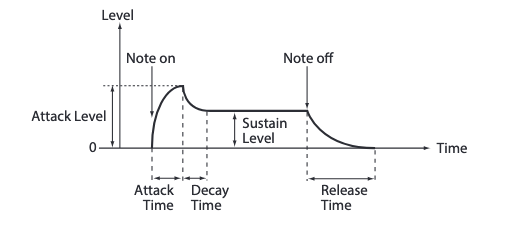


* **attack** 
    * the time taken for initial run-up of level from nil to peak, beginning when the key is pressed.
* **decay** 
    * the time taken for the subsequent run down from the attack level to the designated sustain level.
* **sustain** 
    * the level during the main sequence of the sound's duration, until the key is released.
* **release** 
    * the time taken for the level to decay from the sustain level to zero after the key is released
    
    
--- 
https://python.plainenglish.io/build-your-own-python-synthesizer-part-2-66396f6dad81

## Generate sine wave

In [64]:
frequency = 220
amplitude = 0.5
duration = 1.0
sample_rate = 22050
each_sample = np.arange(int(duration*sample_rate))
sine = np.sin(2 * np.pi * each_sample * frequency / sample_rate) * amplitude

## Create ADSR settings parameters

In [77]:
attack_range = np.linspace(0.001, 5, num=100) * sample_rate
decay_range = np.linspace(0.005, 10, num=100) * sample_rate
sustain_range = np.linspace(0.005, 10, num=100) * sample_rate
release_range = np.linspace(0.005, 10, num=100) * sample_rate 

attack = 4
decay = 4
sustain = 4
release = 5 # defines when in the sound, the player is releasing the note; will always be hit; a value of 100 denotes that decay and sustain are not hit and will bump up against the attack portion of the envelope
release_range[release] 

11241.045454545454

## Create actual ADSR

In [78]:
attack_amplitude = 1.0
sustain_amplitude = 0.75

attack_plot = np.geomspace(0.01, attack_amplitude, num=int(attack_range[attack]))
decay_plot = np.geomspace(1, sustain_amplitude, num=int(decay_range[decay]))
sustain_plot = np.ones(int(sustain_range[sustain])) * sustain_amplitude
release_plot = np.geomspace(sustain_amplitude, 0.001, int(release_range[release]))

def release(sine_wave, attack_plot_setting, release_param):
    len_sine_wave = sine_wave.size
    len_attack = attack_plot_setting.size
    # if len of release > len of decay and sustain: 
    #     then only care about the release; make the remaining part of the envelope, after attack, the release
    
    release_plot = np.geomspace(sustain_amplitude, 0.001, int(release_param))
    return 

sine.size

22050

In [40]:
envelope = np.concatenate([attack_plot, decay_plot, sustain_plot, release_plot])
envelope.size

66658

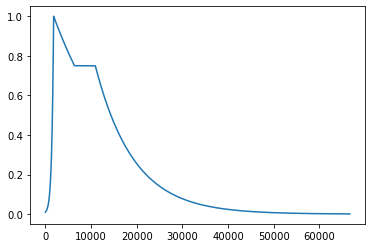

In [41]:
plt.plot(envelope)

In [43]:
sine *= envelope

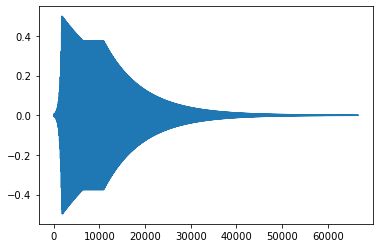

In [44]:
plt.plot(sine)

In [45]:
ipd.Audio(sine, rate=sample_rate)